In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import pandas as pd
# from datetime import datetime
# import numpy as np
# import matplotlib.pyplot as plt

# plt.rcParams['figure.figsize'] = (10, 10)
# plt.rcParams['axes.grid'] = True
# plt.rcParams['font.size'] = 12

# df = pd.read_excel('../time_series.xlsx')

# df = df[["DATE", 'TMAX_LA']]
# df.set_index('DATE', inplace=True)
# df = df.fillna(method='ffill')

# rolmean = df.rolling(window = 250).mean()
# rolstd  = df.rolling(window = 250).std()

# dfplot = plt.plot(df, color='b', label=f'TMax (C)')
# mean   = plt.plot(rolmean, color='r', label='Rolling Mean')
# std    = plt.plot(rolstd, color='y', label='Rolling STD')
# plt.legend(loc='best')
# plt.title(f'Las Americas TMax (C) Time Serie (1960-2021) - Rolling Statistics (Mean & STD)')
# plt.gcf()
# plt.savefig(f'../rolling_TMax_LA', bbox_inches='tight')
# plt.show(block=False)

In [3]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 12

In [4]:
df = pd.read_excel('../time_series_onamet_data.xlsx')

In [5]:
sttn, field = ['LA','TMIN']
col_name = f'{field}_{sttn}'
if sttn == 'LA':
    sttn = 'Las Americas'
    s    = 'LA'
else: 
    sttn = 'La Central'
    s    = 'LC'

In [6]:
df = df[["DATE", col_name]]
df.loc[df['DATE'] == datetime(2017,5,31)]

,DATE,TMIN_LA
20970,2017-05-31,22.5


In [7]:
df.set_index('DATE', inplace=True)

#https://itecnote.com/tecnote/python-arima-model-missingdataerror-exog-contains-inf-or-nans/
df = df.fillna(method='ffill')

In [8]:
df.describe()

,TMIN_LA
count,22646.000000
mean,21.487768
std,1.981736
min,10.300000
25%,20.000000
50%,21.800000
75%,23.000000
max,29.600000


In [9]:
print(df.max())
df[[col_name]].idxmax()

TMIN_LA    29.6
dtype: float64


TMIN_LA   2008-09-01
dtype: datetime64[ns]

In [20]:
print(df.min())
df[[col_name]].idxmin()

TMIN_LA    10.3
dtype: float64


TMIN_LA   2017-03-27
dtype: datetime64[ns]

<function matplotlib.pyplot.show(close=None, block=None)>

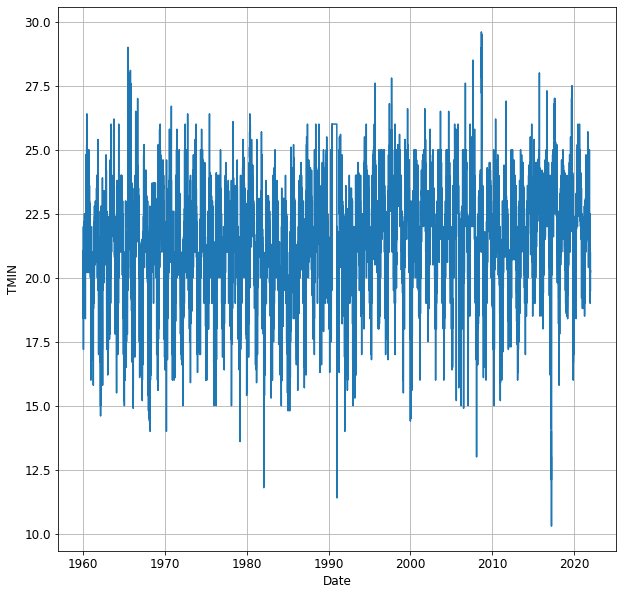

In [10]:
plt.xlabel('Date')
plt.ylabel(field)
plt.plot(df)
plt.show

In [11]:
#rolling statistics
rolmean = df.rolling(window = 250).mean()
rolstd = df.rolling(window = 250).std()
print(rolmean, rolstd)

            TMIN_LA
DATE               
1960-01-01      NaN
1960-01-02      NaN
1960-01-03      NaN
1960-01-04      NaN
1960-01-05      NaN
...             ...
2021-12-27  22.4804
2021-12-28  22.4736
2021-12-29  22.4640
2021-12-30  22.4560
2021-12-31  22.4480

[22646 rows x 1 columns]              TMIN_LA
DATE                
1960-01-01       NaN
1960-01-02       NaN
1960-01-03       NaN
1960-01-04       NaN
1960-01-05       NaN
...              ...
2021-12-27  1.065889
2021-12-28  1.074356
2021-12-29  1.089224
2021-12-30  1.099938
2021-12-31  1.114101

[22646 rows x 1 columns]


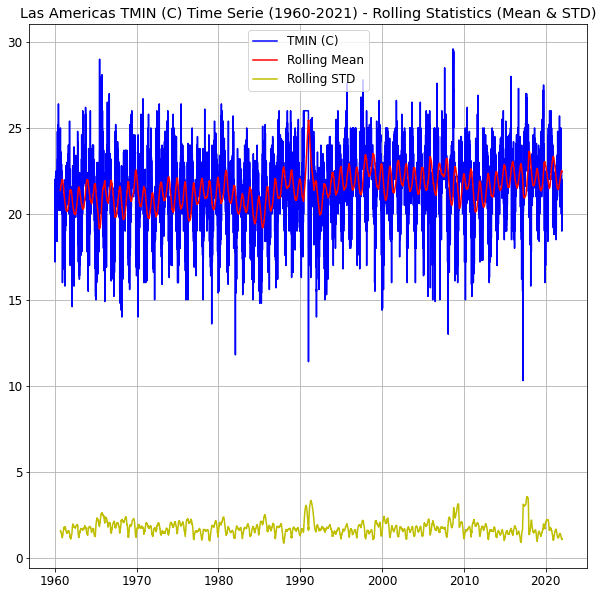

In [12]:
#Plot rolling statistics:
fig,ax = plt.subplots()
# ax2 = ax.twinx()

dfplot = ax.plot(df, color='b', label=f'{field} (C)')
mean = ax.plot(rolmean, color='r', label='Rolling Mean')
std  = ax.plot(rolstd, color='y', label='Rolling STD')




plt.legend(loc='best')
plt.title(f'{sttn} {field} (C) Time Serie (1960-2021) - Rolling Statistics (Mean & STD)')
# plt.gcf()
# plt.savefig(f'../rolling_{field}_{s}', bbox_inches='tight')
plt.show(block=False)

Cheking stationarity with rolling mean and standart deviation

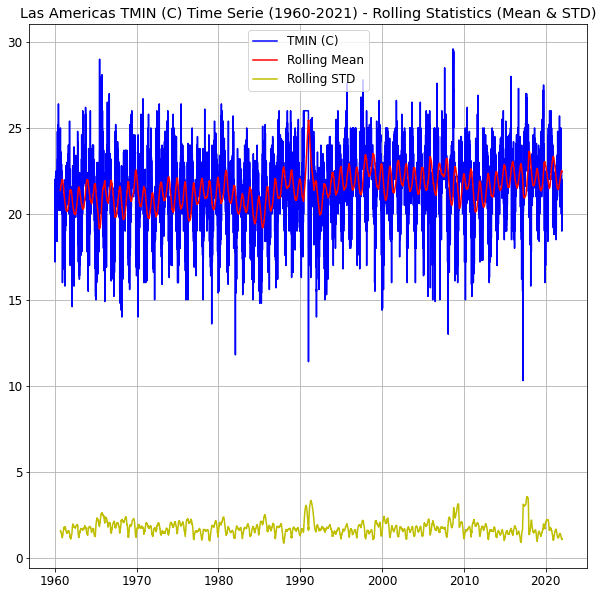

In [13]:
#Plot rolling statistics:

dfplot = plt.plot(df, color='b', label=f'{field} (C)')
mean = plt.plot(rolmean, color='r', label='Rolling Mean')
std = plt.plot(rolstd, color='y', label='Rolling STD')



plt.legend(loc='best')
plt.title(f'{sttn} {field} (C) Time Serie (1960-2021) - Rolling Statistics (Mean & STD)')
plt.gcf()
plt.savefig(f'../rolling_{field}_{s}', bbox_inches='tight')
plt.show(block=False)

Cheking Stationarity with Augented Dickey Fuller Statistical Test

In [14]:
#Perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey Fuller Test')
dftest = adfuller(df[col_name], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p vaue', 
                                        '# Lags Used', '# of Obs Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey Fuller Test
Test Statistic         -9.941029e+00
p vaue                  2.664135e-17
# Lags Used             1.900000e+01
# of Obs Used           2.262600e+04
Critical Value (1%)    -3.430639e+00
Critical Value (5%)    -2.861668e+00
Critical Value (10%)   -2.566838e+00
dtype: float64


Converting Non stationary Data to a Stationary Dataset: 

1-Log 
2-Substracting Simple rolling average 
3-Substracting exponential rolling averages
4-Substracting previuos value (most popular) whith Shift()
5-Seasonal decomposition
6-Combination of the above

1-Log

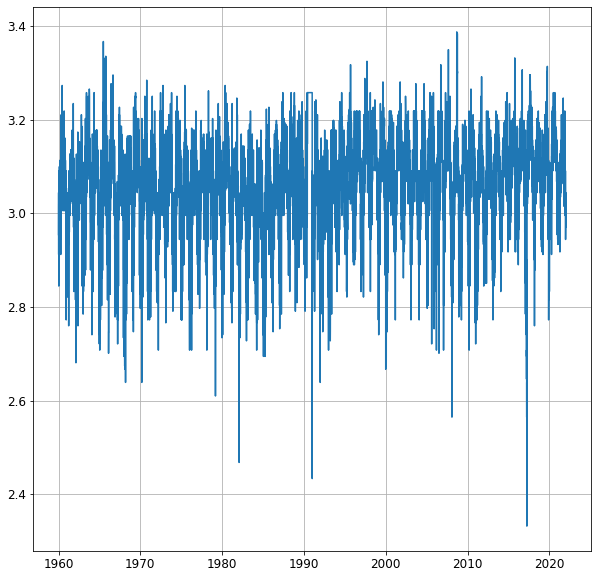

In [15]:
df_logScale = np.log(df)
plt.plot(df_logScale)
plt.show()

<AxesSubplot:xlabel='TMIN_LA'>

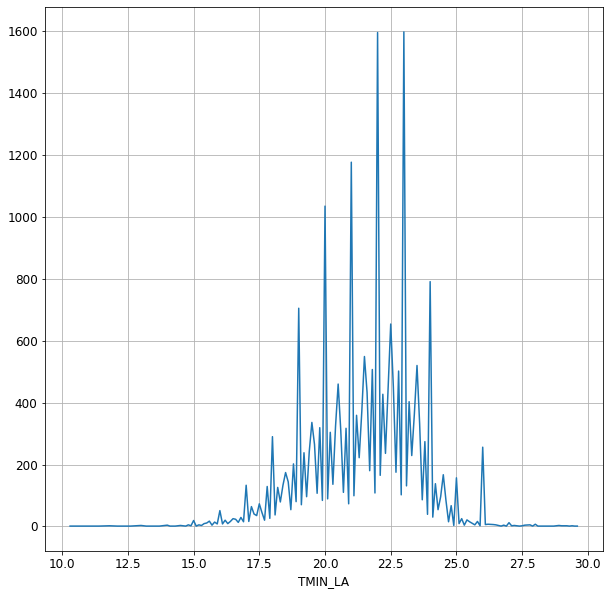

In [16]:
# df[col_name] = df[col_name].round()
df.groupby([col_name]).size().plot()

In [17]:
df.describe()

,TMIN_LA
count,22646.000000
mean,21.487768
std,1.981736
min,10.300000
25%,20.000000
50%,21.800000
75%,23.000000
max,29.600000


In [18]:
print(df[col_name].max())
df[[col_name]].idxmax()

29.6


TMIN_LA   2008-09-01
dtype: datetime64[ns]

In [19]:
print(df[col_name].min())
df[[col_name]].idxmin()

10.3


TMIN_LA   2017-03-27
dtype: datetime64[ns]